# 인공신경망(Artifical Neural Network)

* 사람의 두뇌의 생물학적 작동형태를 모방해서 컴퓨터로 하여금 지적능력을 갖게 한 방법론
* 인공신경망이 더 확장된 것이 Deep Learning

###### 인공신경망의 구조

1. 입력층(input Layer)  : 지료가 입력
1. 은닉층(Hidden Layer) : 은닉층에서 가중치를 주어 계산
1. 출력층(Output Layer) : 계산결과를 받아서 출력
* 딥러닝은 은닉층의 갯수를 많이 늘려서 계산하는 방법

###### 퍼셉트론
<img src="./images/28.머신러닝_지도학습_5_인공신경망_01.png" width="500" height="400">
<img src="./images/28.머신러닝_지도학습_5_인공신경망_02.png" width="500" height="400">

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

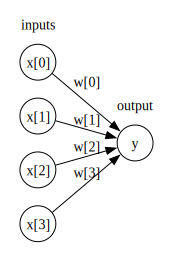

In [2]:
import mglearn
mglearn.plots.plot_logistic_regression_graph()

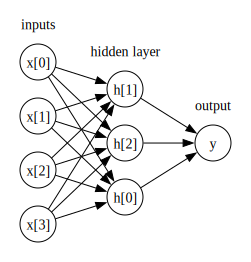

In [3]:
# 은닉층 1개
mglearn.plots.plot_single_hidden_layer_graph()

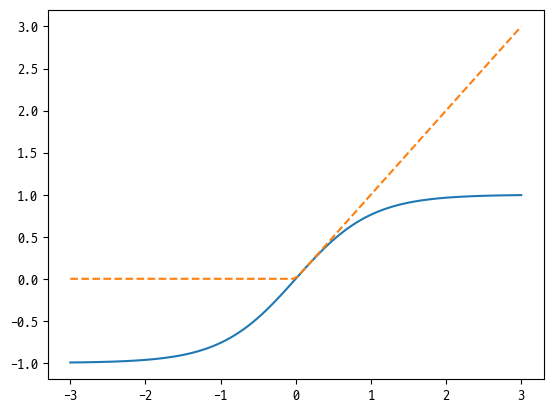

In [8]:
# 활성화함수
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), linestyle='--', label='relu')

plt.show()

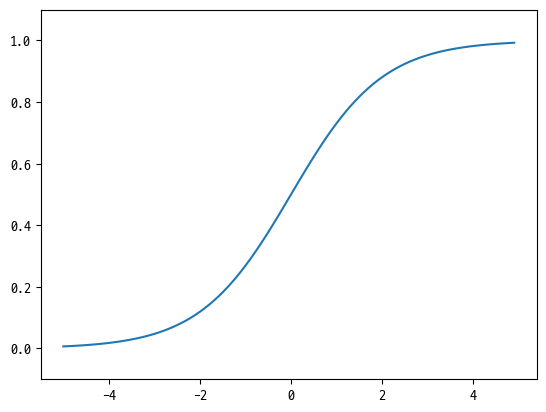

In [19]:
# 시그모이드함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

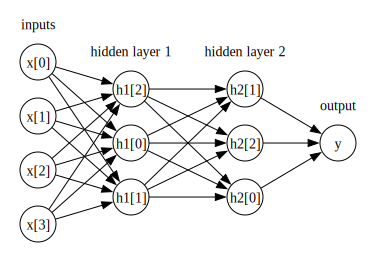

In [20]:
mglearn.plots.plot_two_hidden_layer_graph()

##### 신경망

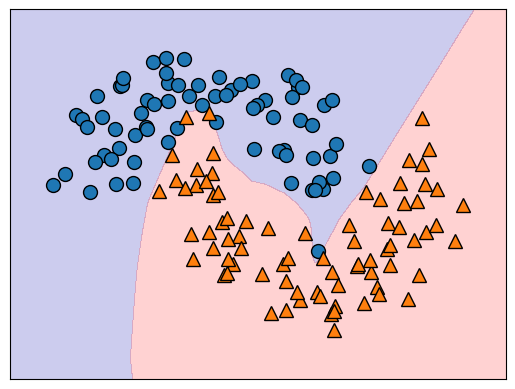

In [43]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X, y = datasets.make_moons(n_samples=200, noise=.2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

# solver='lbfgs'옵션은 가중치를 최적화시키는 알고리즘
mlp = MLPClassifier(solver='lbfgs', activation='relu', random_state=0) \
        .fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.2)

plt.show()

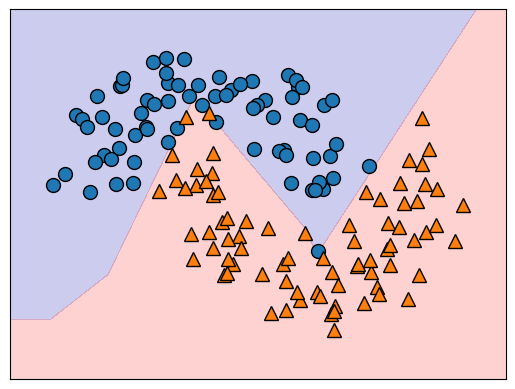

In [55]:
# 1개의 은닉층, 유닛이 10개
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

# solver옵션은 최적화(Optimizer)알고리즘
mlp = MLPClassifier(solver='lbfgs', activation='relu'
                    , hidden_layer_sizes=[10], random_state=0) 
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.2)
plt.show()

# 결과분석
# 1개의 은닉층에 10(hidden_layer_sizes)의 유닛이 만들어낸 직선 10개가 합쳐져서
# 결정경계를 나타낸 것이다. 
# 부드러운 결정경계를 원할 경우에 유닛을 더 추가하거나 활성화함수를 tanh함수를
# 사용할 수 있다.

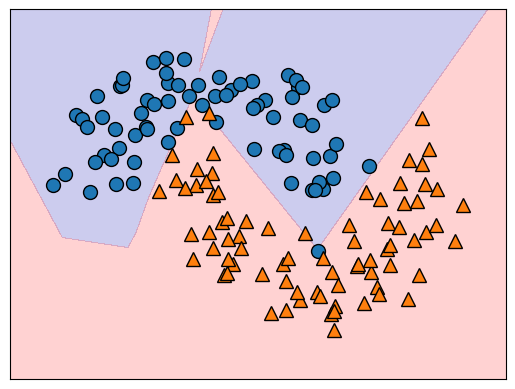

In [58]:
# 2개의 은닉층, 유닛이 10개, relu vs tanh 비교
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

# solver옵션은 최적화(Optimizer)알고리즘
mlp = MLPClassifier(solver='lbfgs', activation='relu'
                    , hidden_layer_sizes=[10, 10], random_state=0) 
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.2)
plt.show()

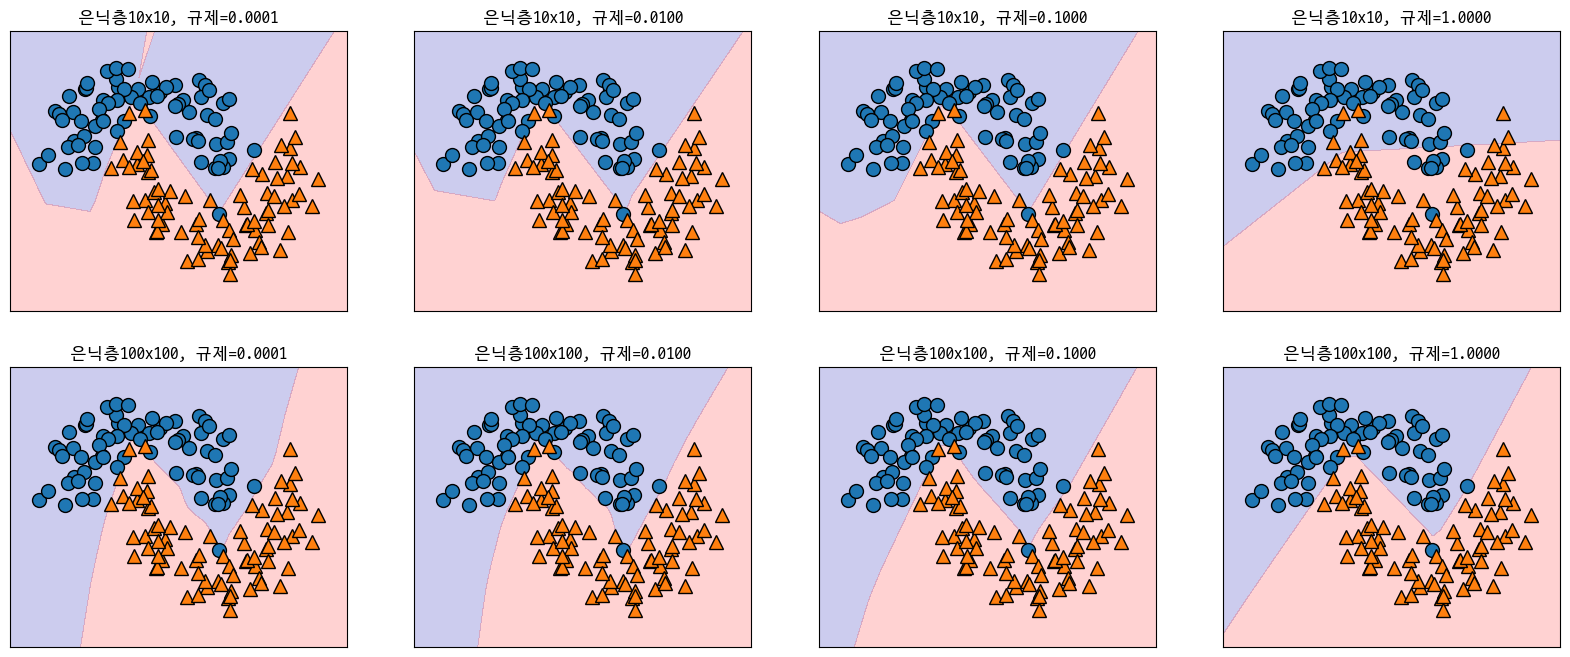

In [60]:
# 은닉층과 유닛의 갯수에 따른 결정경계를 제어하기
# 신경망의 복잡도를 제어하는 방법은 은닉층과 유닛수에 규제(alpha)를 사용한다.
fig, axes = plt.subplots(2, 4, figsize=(20,8))

for axs, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axs, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', activation='relu'
                    , hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes]
                    , alpha=alpha, random_state=0)  
        mlp.fit(X_train, y_train)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.2, ax=ax)
        ax.set_title(f'은닉층{n_hidden_nodes}x{n_hidden_nodes}, 규제={alpha:.4f}')

##### 실습. 유방암데이터셋으로 MLPClassfier 모델을 사용 기계학습하기
* 훈련용데이터셋의 정확도와 검증용데이터셋의 정확도를 출력

In [72]:
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=.3, random_state=42)
mlp = MLPClassifier(solver='adam', activation='relu', random_state=0)
mlp.fit(X_train, y_train)

print(f'훈련용 데이터셋 = {mlp.score(X_train, y_train):.3f}')
print(f'검증용 데이터셋 = {mlp.score(X_test, y_test):.3f}')

훈련용 데이터셋 = 0.945
검증용 데이터셋 = 0.965


In [73]:
# 데이터셋의 표준화 : -1.0~1.0사이의 값으로 표준화
# from sklearn.preprocessing import StandardScaler
# StandardScaler함수를 이용하지 않고 직접 로직을 구현
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)
X_train_scaled = (X_train - train_mean) / train_std
X_test_scaled = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

mlp = MLPClassifier(solver='adam', activation='relu', random_state=0)
mlp.fit(X_train_scaled, y_train)

print(f'훈련용 데이터셋 = {mlp.score(X_train_scaled, y_train):.3f}')
print(f'검증용 데이터셋 = {mlp.score(X_test_scaled, y_test):.3f}')

훈련용 데이터셋 = 0.992
검증용 데이터셋 = 0.988


In [74]:
mlp = MLPClassifier(solver='lbfgs', activation='relu', random_state=0)
mlp.fit(X_train_scaled, y_train)

print(f'훈련용 데이터셋 = {mlp.score(X_train_scaled, y_train):.3f}')
print(f'검증용 데이터셋 = {mlp.score(X_test_scaled, y_test):.3f}')

훈련용 데이터셋 = 1.000
검증용 데이터셋 = 0.965


In [78]:
mlp = MLPClassifier(solver='adam', activation='relu', random_state=0,
                   max_iter=1000)
mlp.fit(X_train_scaled, y_train)

print(f'훈련용 데이터셋 = {mlp.score(X_train_scaled, y_train):.3f}')
print(f'검증용 데이터셋 = {mlp.score(X_test_scaled, y_test):.3f}')

훈련용 데이터셋 = 0.997
검증용 데이터셋 = 0.977


In [81]:
# 규제를 반영
mlp = MLPClassifier(solver='adam', activation='relu', random_state=0,
                   max_iter=1000, alpha=1)
mlp.fit(X_train_scaled, y_train)

print(f'훈련용 데이터셋 = {mlp.score(X_train_scaled, y_train):.3f}')
print(f'검증용 데이터셋 = {mlp.score(X_test_scaled, y_test):.3f}')

훈련용 데이터셋 = 0.992
검증용 데이터셋 = 0.988


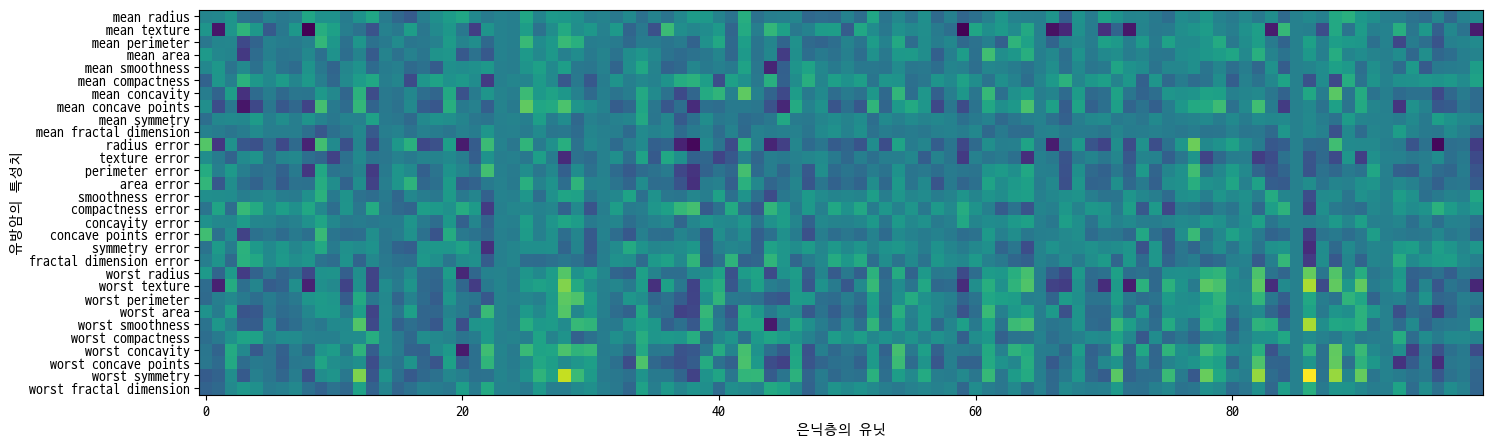

In [90]:
# heatmap
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('은닉층의 유닛')
plt.ylabel('유방암의 특성치')
plt.show()

##### 실습. iris - Perceptron

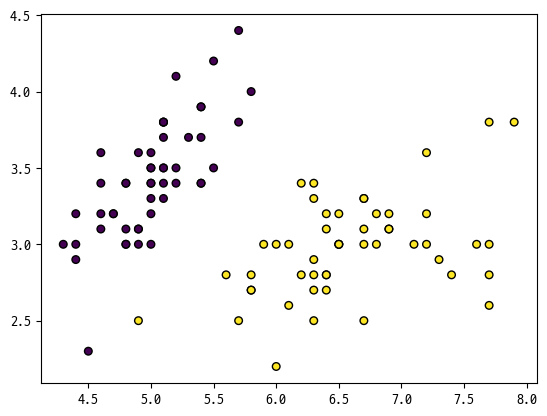

In [97]:
iris = datasets.load_iris()
idx = np.in1d(iris.target, [0,2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

plt.scatter(X[:,0], X[:, 1], c=y, s=30, edgecolors='k')
plt.show()

In [105]:
from sklearn.linear_model import Perceptron
import matplotlib as mpl
import seaborn as sns

def plot_perceptron(n):
    plt.figure(figsize=(12,8), dpi=60)
    # eta0 = learning rate
    model = Perceptron(max_iter=n, eta0=0.1, random_state=0).fit(X, y)
    XX_min = X[:,0].min() - 1; XX_max = X[:,0].max() + 1
    YY_min = X[:,1].min() - 1; YY_max = X[:,1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000)
                       , np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
    
    plt.contourf(XX, YY, ZZ, cmap=cmap)
    plt.scatter(X[:,0], X[:,1], s=50, linewidths=2, edgecolors='k', c=y, cmap=cmap)
    plt.show()

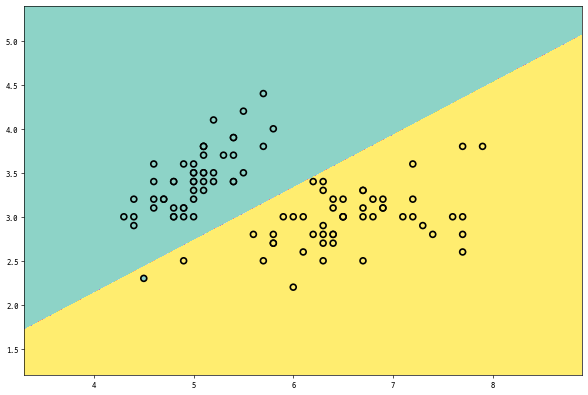

In [106]:
plot_perceptron(500)